In [133]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker 
from sklearn.cluster import KMeans
from datetime import datetime
from pytz import timezone
from sklearn.preprocessing import StandardScaler

In [134]:
dataTest = pd.read_csv("/app/knight/Test_knight.csv")

In [135]:
dataTrain = pd.read_csv("/app/knight/Train_knight.csv")

0     -0.353496
1      0.058916
2      1.014191
3      0.552428
4     -0.886111
         ...   
393   -0.384301
394   -0.641744
395   -0.081279
396   -0.054874
397    0.207284
Name: Friendship, Length: 398, dtype: float64
11.440802507645012
11.440802507645012


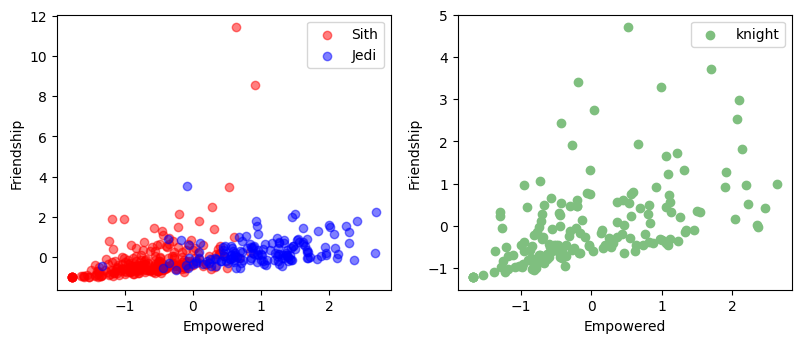

In [136]:
object= StandardScaler()

fig = plt.figure(figsize=(25,25))

scaleTest = object.fit_transform(dataTest)
scaleTest = pd.DataFrame(scaleTest, columns=dataTest.columns)

data = dataTrain[dataTrain.columns[:-1]]
knightTrain = dataTrain['knight']

data = object.fit_transform(data)
dataTrain = pd.DataFrame(data, columns=dataTrain.columns[:-1])
dataTrain = dataTrain.join(knightTrain)

dataTrain = dataTrain.groupby('knight')

plot = plt.subplot2grid((6, 5), (0, 0), fig=fig)

plot.scatter(dataTrain.get_group('Sith')['Empowered'], dataTrain.get_group('Sith')['Friendship'], label='Sith', color='red', alpha=0.5)
plot.scatter(dataTrain.get_group('Jedi')['Empowered'], dataTrain.get_group('Jedi')['Friendship'], label='Jedi', color='blue', alpha=0.5)
plot.set_xlabel('Empowered')
plot.set_ylabel('Friendship')
plot.legend()

plot = plt.subplot2grid((6, 5), (0, 1), fig=fig)

plot.scatter(scaleTest['Empowered'], scaleTest['Friendship'], label='knight', color='#7fbf7f')
plot.set_xlabel('Empowered')
plot.set_ylabel('Friendship')
plot.legend()